### Welcome to the exercise about observational studies! This exercise will be hands on, and you will be able to practise the skills you developed so far!

## Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 6 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to deepen your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

In [48]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline

data_folder = './data/'
df = pd.read_csv(data_folder + 'lalonde.csv')

In [2]:
df.sample(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
590,PSID406,0,16,10,1,0,0,1,0.0000,0.0000,1730.418
458,PSID274,0,18,11,0,0,0,1,131.2709,218.4194,7503.896
278,PSID94,0,47,10,1,0,1,1,13311.2600,4397.0320,19330.140
67,NSW68,1,23,7,0,0,0,1,0.0000,0.0000,0.000
175,NSW176,1,28,11,1,0,0,1,1929.0290,6871.8560,0.000
428,PSID244,0,36,8,0,0,1,1,2715.5440,585.4355,0.000
190,PSID6,0,37,9,1,0,1,1,13685.4800,12756.0500,17833.200
25,NSW26,1,29,11,1,0,1,1,0.0000,0.0000,9642.999
442,PSID258,0,18,10,0,0,0,1,0.0000,386.7097,0.000
433,PSID249,0,19,3,0,0,1,1,0.0000,537.0968,0.000


## 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lecture 4 ("Descibing data") and 3 ("Visualizing data").

What might a naive "researcher" conclude from this superficial analysis?

/home/sdd/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/sdd/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


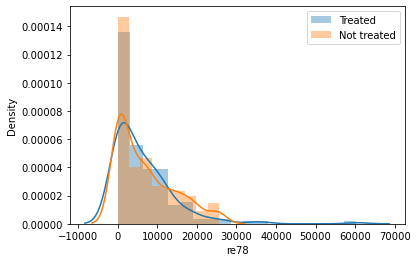

In [38]:
sns.distplot(df[df.treat==1]['re78'],hist=True,label='Treated')
sns.distplot(df[df.treat==0]['re78'],hist=True,label='Not treated')
plt.legend()
plt.show()

In [16]:
df[['treat','re78']].groupby('treat').agg(['describe'])

re78                                                                \
      describe                                                                 
         count         mean          std  min       25%       50%        75%   
treat                                                                          
0        429.0  6984.169742  7294.161791  0.0  220.1813  4975.505  11688.820   
1        185.0  6349.143530  7867.402218  0.0  485.2298  4232.309   9642.999   

                 
                 
            max  
treat            
0      25564.67  
1      60307.93

<AxesSubplot:xlabel='treat', ylabel='re78'>

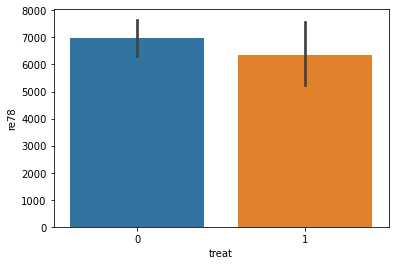

In [17]:
sns.barplot(x='treat',y='re78',data=df)

In [3]:
''' your code and explanations ''';

The results may not be significant since the errorbars overlap. But observationally, treatment decrease mean revenue, but give quite low chance to earn much more than average

## 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

In [42]:
import warnings
warnings.filterwarnings('ignore')

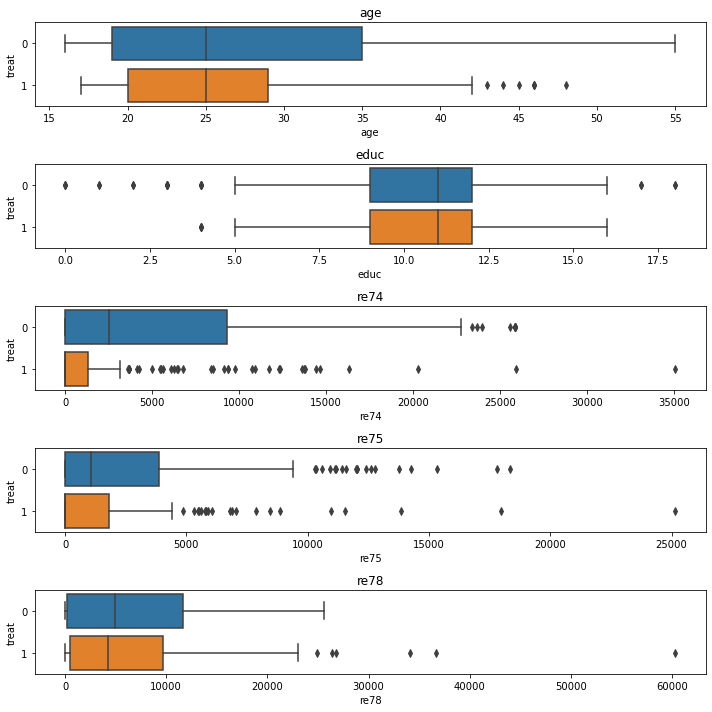

In [82]:
fig,ax=plt.subplots(5,figsize=(10,10))
cont_features=['age','educ','re74','re75','re78']
for i in range(5):
    #sns.histplot(ax=ax[i],x=cont_features[i],data=df,hue='treat',stat='probability')
    #sns.distplot(df[df.treat==1][cont_features[i]],ax=ax[i],hist=True,label='Treated')
    #sns.distplot(df[df.treat==0][cont_features[i]],ax=ax[i],hist=True,label='Not treated')
    sns.boxplot(ax=ax[i],y='treat',x=cont_features[i],data=df,orient='h')
    ax[i].set_title(cont_features[i])
plt.tight_layout()
plt.show()

In [46]:
df.sample()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
265,PSID81,0,23,12,0,0,1,0,11690.95,4764.048,14065.0,1


In [54]:
#sns.barplot(x=)
def race(note):
    if note.black==1:
        return 'Black'
    elif note.hispan==1:
        return 'Hispanic'
    else:
        return 'White'
df['race']=[race(df.iloc[i]) for i in range(len(df))]

<AxesSubplot:xlabel='race', ylabel='Count'>

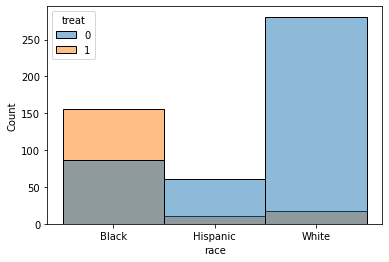

In [60]:
sns.histplot(x='race',data=df,hue='treat')

<AxesSubplot:xlabel='treat'>

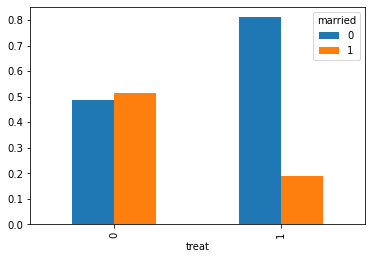

In [87]:
group=df.groupby(['treat','married'])['married'].count().unstack()
group=group.div(group.sum(axis=1),axis=0)
group.plot(kind='bar')

<AxesSubplot:xlabel='treat'>

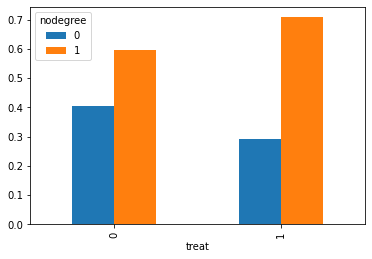

In [88]:
group=df.groupby(['treat','nodegree'])['nodegree'].count().unstack()
group=group.div(group.sum(axis=1),axis=0)
group.plot(kind='bar')

Mostly Black people were treated. Control group is much larger than treated

Races and marriage are highly disbalanced

In [4]:
''' your code and explanations ''';

## 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `statsmodels` to fit the logistic regression model and apply it to each data point to obtain propensity scores.

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

In [89]:
df.sample(5)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,race
386,PSID202,0,20,9,0,1,1,1,0.0000,1283.661,0.000,Hispanic
489,PSID305,0,27,9,0,1,1,1,12829.2800,0.000,0.000,Hispanic
536,PSID352,0,24,12,1,0,0,0,566.2281,0.000,2284.565,Black
498,PSID314,0,22,11,0,0,0,1,8013.4010,0.000,5748.356,White
481,PSID297,0,49,14,0,0,1,0,25862.3200,0.000,25564.670,White


In [94]:
def normalize(feature):
    return (feature-feature.mean())/feature.std()

In [95]:
import statsmodels.formula.api as smf
for feature in ['age','educ','re74','re75']:
    df[feature]=normalize(df[feature])

mod = smf.logit(formula='treat ~  age + educ + C(black) + \
                        C(hispan) + C(married) + C(nodegree) + \
                        re74 + re75', data=df)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:                  0.3508
Time:                        19:40:44   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.8509      0.350     -8.147      0.000      -3.537      -2.165
C(black)[T.

In [100]:
df['Propensity_score']=res.predict(df[['age','educ','black','hispan','married','nodegree','re74','re75']])

In [5]:
''' your code and explanations ''';

## 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

This is how networkx library can help you do this. Each possible pair of (treated_person, control_person) is characterized by a similarity. This is how we can initialize a graph, and add an edge for one possible pair. We then need to add an edge for each possible pair.
    - G = nx.Graph()
    - G.add_weighted_edges_from([(control_person, treated_person, similarity)])
Optimal matching is then found with:
    - matching = nx.max_weight_matching(G)

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

In [97]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

In [101]:
treated=df[df.treat==1]
control=df[df.treat==0]

import networkx as nx
G=nx.Graph()

for control_id,control_row in control.iterrows():
    for treated_id,treated_row in treated.iterrows():
        
        similarity=get_similarity(control_row['Propensity_score'],treated_row['Propensity_score'])
        
        G.add_weighted_edges_from([(control_id, treated_id, similarity)])

matching=nx.max_weight_matching(G)

In [121]:
q=np.zeros(len(matching)*2)
for i,instance in enumerate(matching):
    print(get_similarity(df.iloc[instance[0]]['Propensity_score'],df.iloc[instance[1]]['Propensity_score']))
    q[i]=instance[0]
    q[i+1]=instance[1]

0.45736294211040085
0.9946831048145851
0.9999124895306538
0.9922848363596642
0.5336910983949714
0.9589418134258317
0.500076041985001
0.9990993039828743
0.9366976005579695
0.6181652335778212
0.9961772089962723
0.5172464113628656
0.8881648072973878
0.4917244117887537
0.33799167715740375
0.9422914535800394
0.5187798953651785
0.9555652172917208
0.9917244907976774
0.7281336495482748
0.9979299918072481
0.999279478548269
0.9997070899387646
0.5220822023949809
0.410205569199133
0.5999559306225875
0.9980233691406578
0.8588345884356432
0.9818042627472783
0.5279812820294234
0.9994964285417312
0.9980171432988064
0.4758423419625748
0.9913181701586141
0.8269000377918307
0.9975181151999412
0.9941415748196206
0.6542503279569236
0.49642299171503435
0.44795221841404376
0.6453603727020076
0.6738857145987402
0.8136009627946392
0.977595896366948
0.9966616794796221
0.9836823769999469
0.9965797812921133
0.985067628106068
0.4060363902920465
0.9966499440149582
0.3641814270234903
0.43195662230035925
0.9486707676

In [122]:
''' your code and explanations ''';

balanced_df=df.iloc[q]
balanced_df.head(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,race,Propensity_score
56,NSW57,1,0.975268,-0.482714,1,0,0,1,-0.703546,-0.662971,1067.5060,Black,0.746405
376,PSID192,0,-0.441566,1.039168,0,0,0,0,-0.610694,-0.239792,4975.5050,White,0.096440
528,PSID344,0,1.177673,0.658697,0,0,1,0,-0.504533,-0.662971,1202.8690,White,0.043012
60,NSW61,1,-1.048780,-0.863185,1,0,0,1,-0.703546,-0.662971,0.0000,Black,0.646269
32,NSW33,1,-0.239161,0.278227,1,0,1,1,-0.703546,-0.662971,1574.4240,Black,0.594043
42,NSW43,1,-1.048780,-0.863185,1,0,0,1,-0.703546,-0.662971,8061.4850,Black,0.646269
523,PSID339,0,-0.137958,-0.482714,0,1,0,1,-0.462190,-0.662971,2862.3560,Hispanic,0.216196
360,PSID176,0,-0.846375,1.039168,0,0,0,0,-0.338185,-0.144183,0.0000,White,0.082383
514,PSID330,0,-0.542768,2.180579,1,0,0,0,-0.307638,-0.662971,116.7404,Black,0.746615
26,NSW27,1,-0.239161,0.278227,1,0,0,1,-0.703546,-0.662971,9897.0490,Black,0.770797


## 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


In [124]:
treatment_df = balanced_df[balanced_df['treat'] == 1]
control_df = balanced_df[balanced_df['treat'] == 0]


G = nx.Graph()

for control_id, control_row in control_df.iterrows():
    for treatment_id, treatment_row in treatment_df.iterrows():

        # Adds an edge only if the individuals have the same race
        if (control_row['black'] == treatment_row['black'])\
            and (control_row['hispan'] == treatment_row['hispan']):
            similarity = get_similarity(control_row['Propensity_score'],
                                        treatment_row['Propensity_score'])

            G.add_weighted_edges_from([(control_id, treatment_id, similarity)])

matching = nx.max_weight_matching(G)

In [125]:
q=np.zeros(len(matching)*2)
for i,instance in enumerate(matching):
    #print(get_similarity(df.iloc[instance[0]]['Propensity_score'],df.iloc[instance[1]]['Propensity_score']))
    q[i]=instance[0]
    q[i+1]=instance[1]
balanced_df=df.iloc[q]
balanced_df.head(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,race,Propensity_score
24,NSW25,1,-0.947578,-0.102244,1,0,0,1,-0.703546,-0.662971,11163.1700,Black,0.719316
576,PSID392,0,-1.048780,-0.102244,1,0,0,1,-0.703546,-0.662971,0.0000,Black,0.716120
600,PSID416,0,0.671661,0.658697,1,0,0,0,-0.703546,-0.662971,0.0000,Black,0.691858
552,PSID368,0,1.278875,0.278227,1,0,1,1,-0.703546,-0.662971,0.0000,Black,0.649618
128,NSW129,1,-0.441566,0.658697,0,1,0,0,0.745326,-0.323909,559.4432,Hispanic,0.113004
208,PSID24,0,1.987292,-0.863185,1,0,1,1,0.728257,1.929339,0.0000,Black,0.508688
402,PSID218,0,-1.048780,-0.482714,1,0,0,1,-0.703546,-0.365279,8900.3470,Black,0.693477
584,PSID400,0,0.975268,-0.863185,1,0,0,1,-0.703546,-0.662971,648.7220,Black,0.714680
360,PSID176,0,-0.846375,1.039168,0,0,0,0,-0.338185,-0.144183,0.0000,White,0.082383
153,NSW154,1,-0.441566,0.658697,1,0,0,0,0.264249,0.259437,8484.2390,Black,0.586073


## 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?

In [9]:
''' your code and explanations ''';

In [126]:
treated = balanced_df.loc[balanced_df['treat'] == 1] #People that attained the program
control = balanced_df.loc[balanced_df['treat'] == 0] #People that didn't attain the program

In [127]:
treated.re78.describe()

count       90.000000
mean      8120.039336
std       3575.524578
min          0.000000
25%       7605.729500
50%       9930.046000
75%       9930.046000
max      15952.600000
Name: re78, dtype: float64

In [128]:
control.re78.describe()

count       26.000000
mean      4773.909873
std       6710.422585
min          0.000000
25%          0.000000
50%        905.107500
75%       8596.304750
max      20243.380000
Name: re78, dtype: float64

In [142]:
description=df[['treat','re78']].groupby('treat').agg(['describe'])
description.append(balanced_df[['treat','re78']].groupby('treat').agg(['describe']))

re78                                                       \
      describe                                                        
         count         mean          std  min        25%        50%   
treat                                                                 
0        429.0  6984.169742  7294.161791  0.0   220.1813  4975.5050   
1        185.0  6349.143530  7867.402218  0.0   485.2298  4232.3090   
0         26.0  4773.909873  6710.422585  0.0     0.0000   905.1075   
1         90.0  8120.039336  3575.524578  0.0  7605.7295  9930.0460   

                              
                              
               75%       max  
treat                         
0      11688.82000  25564.67  
1       9642.99900  60307.93  
0       8596.30475  20243.38  
1       9930.04600  15952.60